# Basic Data Visualization with Matplotlib

So I've learned some of the basics of Pandas.  I can explore my dataframe, examine and treat missing values, pivot and summarize the frame, do some indexing and subsetting, etc.  But I'm a visual learner (and I bet you are too) and I now want to use Python's matplotlib package to produce some basic plots.  

This article will review the utility and implementation of four (4) common plot types when working with data:

1. Histograms
2. Bar Graphs
3. Line Plots
4. Scatter Plots

Let's import and tidyup some data, first.  Once again, I'll work with data that I track and consolidate on my cycling training, which is available on my public github account.

In [49]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Get the datafile from my public GitHub repo
url = 'https://raw.githubusercontent.com/joelmsherman/explain_python-dataframe/master/HRV_Training_Sleep_clean.csv'

# Read the content and turn it into a Pandas Dataframe
df = pd.read_csv(url, error_bad_lines=False)

# Subset the frame
df = df[['date', 'HRV4T_Recovery_Points', 'training', ' trainingTSS', 'sleep_time']]
df = df[(df['date'] >= '2020-01-01')]
df.columns = ['Date', 'RecScore', 'TrainType', 'TrainTSS', 'SleepHrs']

# Cleanup and tidy the frame
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format = True)
df['RecScore'] = df['RecScore'].fillna((df['RecScore'].mean()))
df['TrainTSS'] = df['TrainTSS'].fillna(0)
df['SleepHrs'] = df['SleepHrs'].replace(0, df['SleepHrs'].mean()) 

## 1. Histogram

Histograms are one of the most effective plot types for showing the distribution, or spread, of continuous, numerical data, and are a go-to plot when initially exploring a new dataset.  In my dataset is a numerical feature called 'TrainTSS', which measures how stressful a particular training day was for me in terms of intensity and duration.  Because it's usually unproductive (and impossible, given that I'm a father of young children and learning data science!) to train every day, I'm going to look at a histogram of my 'TrainTSS' for only the days that I've trained (i.e TSS is not zero).  Using matplotlib, we call the .hist() method. 

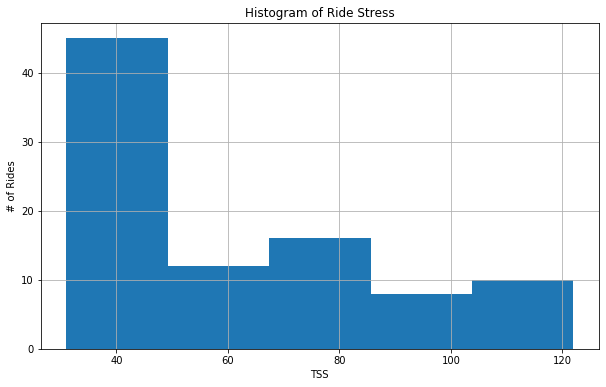

<Figure size 432x288 with 0 Axes>

In [81]:
plt.figure(figsize=(10,6))
df[df['TrainTSS']!=0]['TrainTSS'].hist(bins = 5)
plt.xlabel('TSS')
plt.ylabel('# of Rides')
plt.title('Histogram of Ride Stress')
plt.show()
plt.savefig("TSS_distribution.png")

Pretty easy.  And I'm referring to both plotting a histogram and looking at my ride stress since the beginning of the year.  No wonder I'm slowly losing fitness.  My typical ride is only between 40 and 50 TSS, which is low for me and not enough to cause the adaptations that I need to get faster.  But I digress.  Let's look at bar graphs now.

## 2. Bar Graphs

Bar graphs are typically used to compare numerical measures (typically of central tendency, like average or median) across values of a dimension column.  For example, we could compare the average height (measure) between men and women (gender dimension) using a bar graph.  In my dataset, I have a feature called 'TrainType', which is an object that describes how intense my training day was, as well as a feature called 'SleepHrs', which reports the hours in which i slept the night before a training.  Let's see how my average 'SleepHrs" varied by 'TrainType' with a bar graph.  

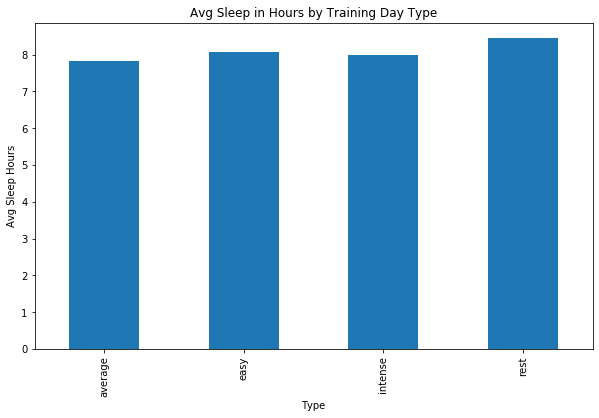

<Figure size 432x288 with 0 Axes>

In [84]:
plt.figure(figsize=(10,6))
df_grouped = df.groupby('TrainType')['SleepHrs'].mean()
df_grouped.plot(kind = 'bar')
plt.xlabel('Type')
plt.ylabel('Avg Sleep Hours')
plt.title('Avg Sleep in Hours by Training Day Type')
plt.show()
plt.savefig("avg_sleep_by_ridetype.png")

Super boring stuff (I'm referring to my sleep patterns, and not creating the bar graph).  I maintain a pretty steady rhythm of about 8 hours per night of sleep, whether or not I have a rest day or intense training day the next day.  Sleep is vital and not to be messed with.  Ok, onward.  Next up are line plots.  

## 3. Line Plots

Line plots are typically used to plot a numerical measure over time.  As an econometrician, they are indispensable to me because I typically (almost exclusively) work with time series data.  In this dataset however, I'll plot a time series of the 'RecScore' feature, by day.  'RecScore' is an endogenously calculated score of my recovery for a particular day, approximately on a scale between 1 and 10, with higher values representing higher parasympathetic activity, lower stress, better recovery (in general).  It's calculated by a tool that I use called HRV4Training, that takes in heart rate variability data from a ring that I wear while sleeping.  More information on those can be found here (HRV4Training.com) and here (ouraring.com).   

<Figure size 720x432 with 0 Axes>

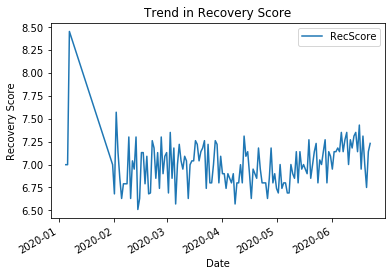

<Figure size 432x288 with 0 Axes>

In [88]:
plt.figure(figsize=(10,6))
df.plot(x='Date', y='RecScore', kind='line')
plt.xlabel('Date')
plt.ylabel('Recovery Score')
plt.title('Trend in Recovery Score')
plt.show()
plt.savefig("recovery_score_trend.png")

While it looks like January 2020 had measurements that appear to be anomalies, for the most part, my recovery score has been holding pretty steady at about 7 over time, without too much variability, since February.  And now, let's look at scatter plots.

## 4. Scatter Plots

Just as a line plot displays data over time, scatter plots display data points at their respective intersections of two measures, and are a very useful plot for examining relationships between two numerical features.  Here, I'll make a scatter plot of my training stress ('TrainTSS') against my recovery score ('RecScore') to see if there are any relationships.

<Figure size 720x432 with 0 Axes>

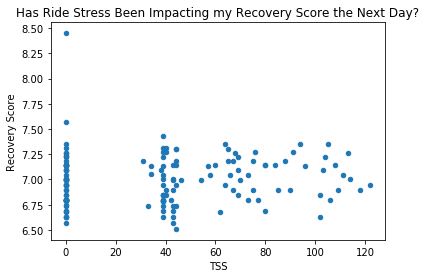

<Figure size 432x288 with 0 Axes>

In [93]:
plt.figure(figsize=(10,6))
df.plot(x='TrainTSS', y='RecScore', kind='scatter')
plt.xlabel('TSS')
plt.ylabel('Recovery Score')
plt.title('Has Ride Stress Been Impacting my Recovery Score the Next Day?')
plt.show()
plt.savefig("TSS_Recovery_scatter.png")

Its pretty clear that the TSS of my training rides doesn't show much relationship to my recovery score the next day.  On days that I have no ride (TSS = 0), my recovery score the next day fluctuates just as much as it does on days that I post mid to even high TSS, on average.  

Despite the lack of evidence in my case here, there is a well-established theoretical relationship between these features, and as my histogram above suggests, it just may not be present in my data because of the relatively low-stress rides I've been doing this year.  

I hope this article has been as useful to you as it's been to me.  Not only have I gotten to practice some skills in visualizing data in matplotlib, but I've also learned that I need to up my training game if I want to get faster!